In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from deepshape.surfaces import *

In [5]:
g = LogStepQuadratic()

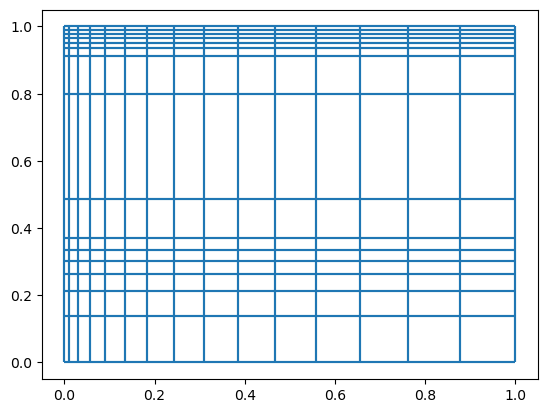

In [8]:
plot_diffeomorphism(g)
plt.show()

In [70]:
from numpy import pi
from torch import sin

def bump(x):
    return sin(pi * x[..., [0]]) * sin(pi * x[..., [1]]) / pi

class VanishingDiffeomorphism(Diffeomorphism):
    def __init__(self, g: Diffeomorphism):
        super().__init__(g.S)
        self.g = g
        
    def __call__(self, x):
        return x + bump(x) * (self.g(x) - x)

In [71]:
x.shape

torch.Size([16, 16, 2])

In [72]:
g(x).shape

torch.Size([16, 16, 2])

In [73]:
bump(x).shape

torch.Size([16, 16, 1])

In [74]:
x = torch_square_grid(k=16)

In [75]:
plt.contourf(bump(x), levels=100)
plt.colorbar()
plt.show()

TypeError: Input z must be 2D, not 3D

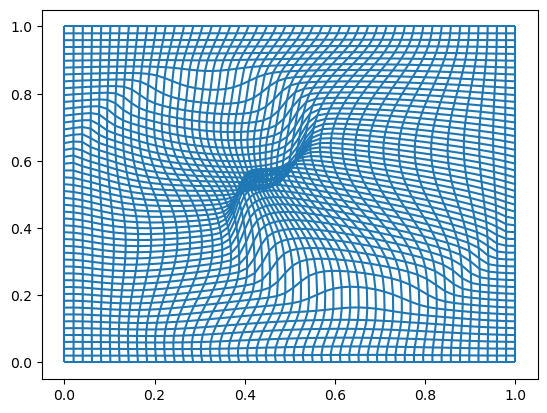

In [76]:
plot_diffeomorphism(VanishingDiffeomorphism(
    LogStepQuadratic().compose(
        RotationDiffeomorphism().compose(
            RotationDiffeomorphism()
        )
    )
),
                   k=50)
plt.show()

In [ ]:
g = VanishingDiffeomorphism()

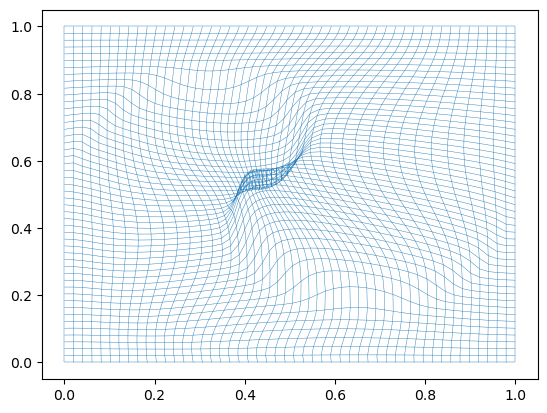

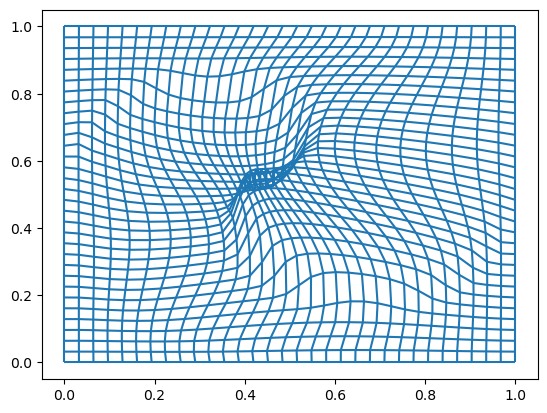

In [77]:
g = LogStepQuadratic().compose(RotationDiffeomorphism().compose(
            RotationDiffeomorphism().compose(
            LogStepQuadratic())
))

g = LogStepQuadratic().compose(RotationDiffeomorphism()).compose(RotationDiffeomorphism())
h = VanishingDiffeomorphism(g)
plot_diffeomorphism(h, k=50, lw=0.3)
plt.show()
plot_diffeomorphism(VanishingDiffeomorphism(g), k=32)
plt.show()